# <p><center style="font-family:newtimeroman;font-size:180%;">Alzheimer's Dataset ( 4 class of Images) Analysis & Visualization</center></p>

### Dataset :

* dataset:

**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import os 
import cv2
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import ImageGrid

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/kaggle/input/fdata-adni-dataset')):
    subfolder_path = os.path.join('/kaggle/input/fdata-adni-dataset', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
df = pd.DataFrame({'image': images, 'label': labels})
df



100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


,image,label
0,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,LMCI
1,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,LMCI
2,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,LMCI
3,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,LMCI
4,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,LMCI
...,...,...
33979,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,CN
33980,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,CN
33981,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,CN
33982,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,CN


In [3]:
class_mapping = {
    'CN': 'Cognitively normal',
    'EMCI': 'Early mild cognitive impairment',
    'LMCI': 'Late mild cognitive impairment',
    'AD': 'Alzheimer_s disease'
}

# Rename the classes in the 'class' column
df['label'] = df['label'].map(class_mapping)

In [4]:
df

,image,label
0,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Late mild cognitive impairment
1,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Late mild cognitive impairment
2,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Late mild cognitive impairment
3,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Late mild cognitive impairment
4,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Late mild cognitive impairment
...,...,...
33979,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Cognitively normal
33980,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Cognitively normal
33981,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Cognitively normal
33982,/kaggle/input/fdata-adni-dataset/AugmentedAlzh...,Cognitively normal


**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization & Analysis of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [5]:
# Number of photos in each class
df['label'].value_counts()

label
Early mild cognitive impairment    9600
Late mild cognitive impairment     8960
Alzheimer_s disease                8960
Cognitively normal                 6464
Name: count, dtype: int64

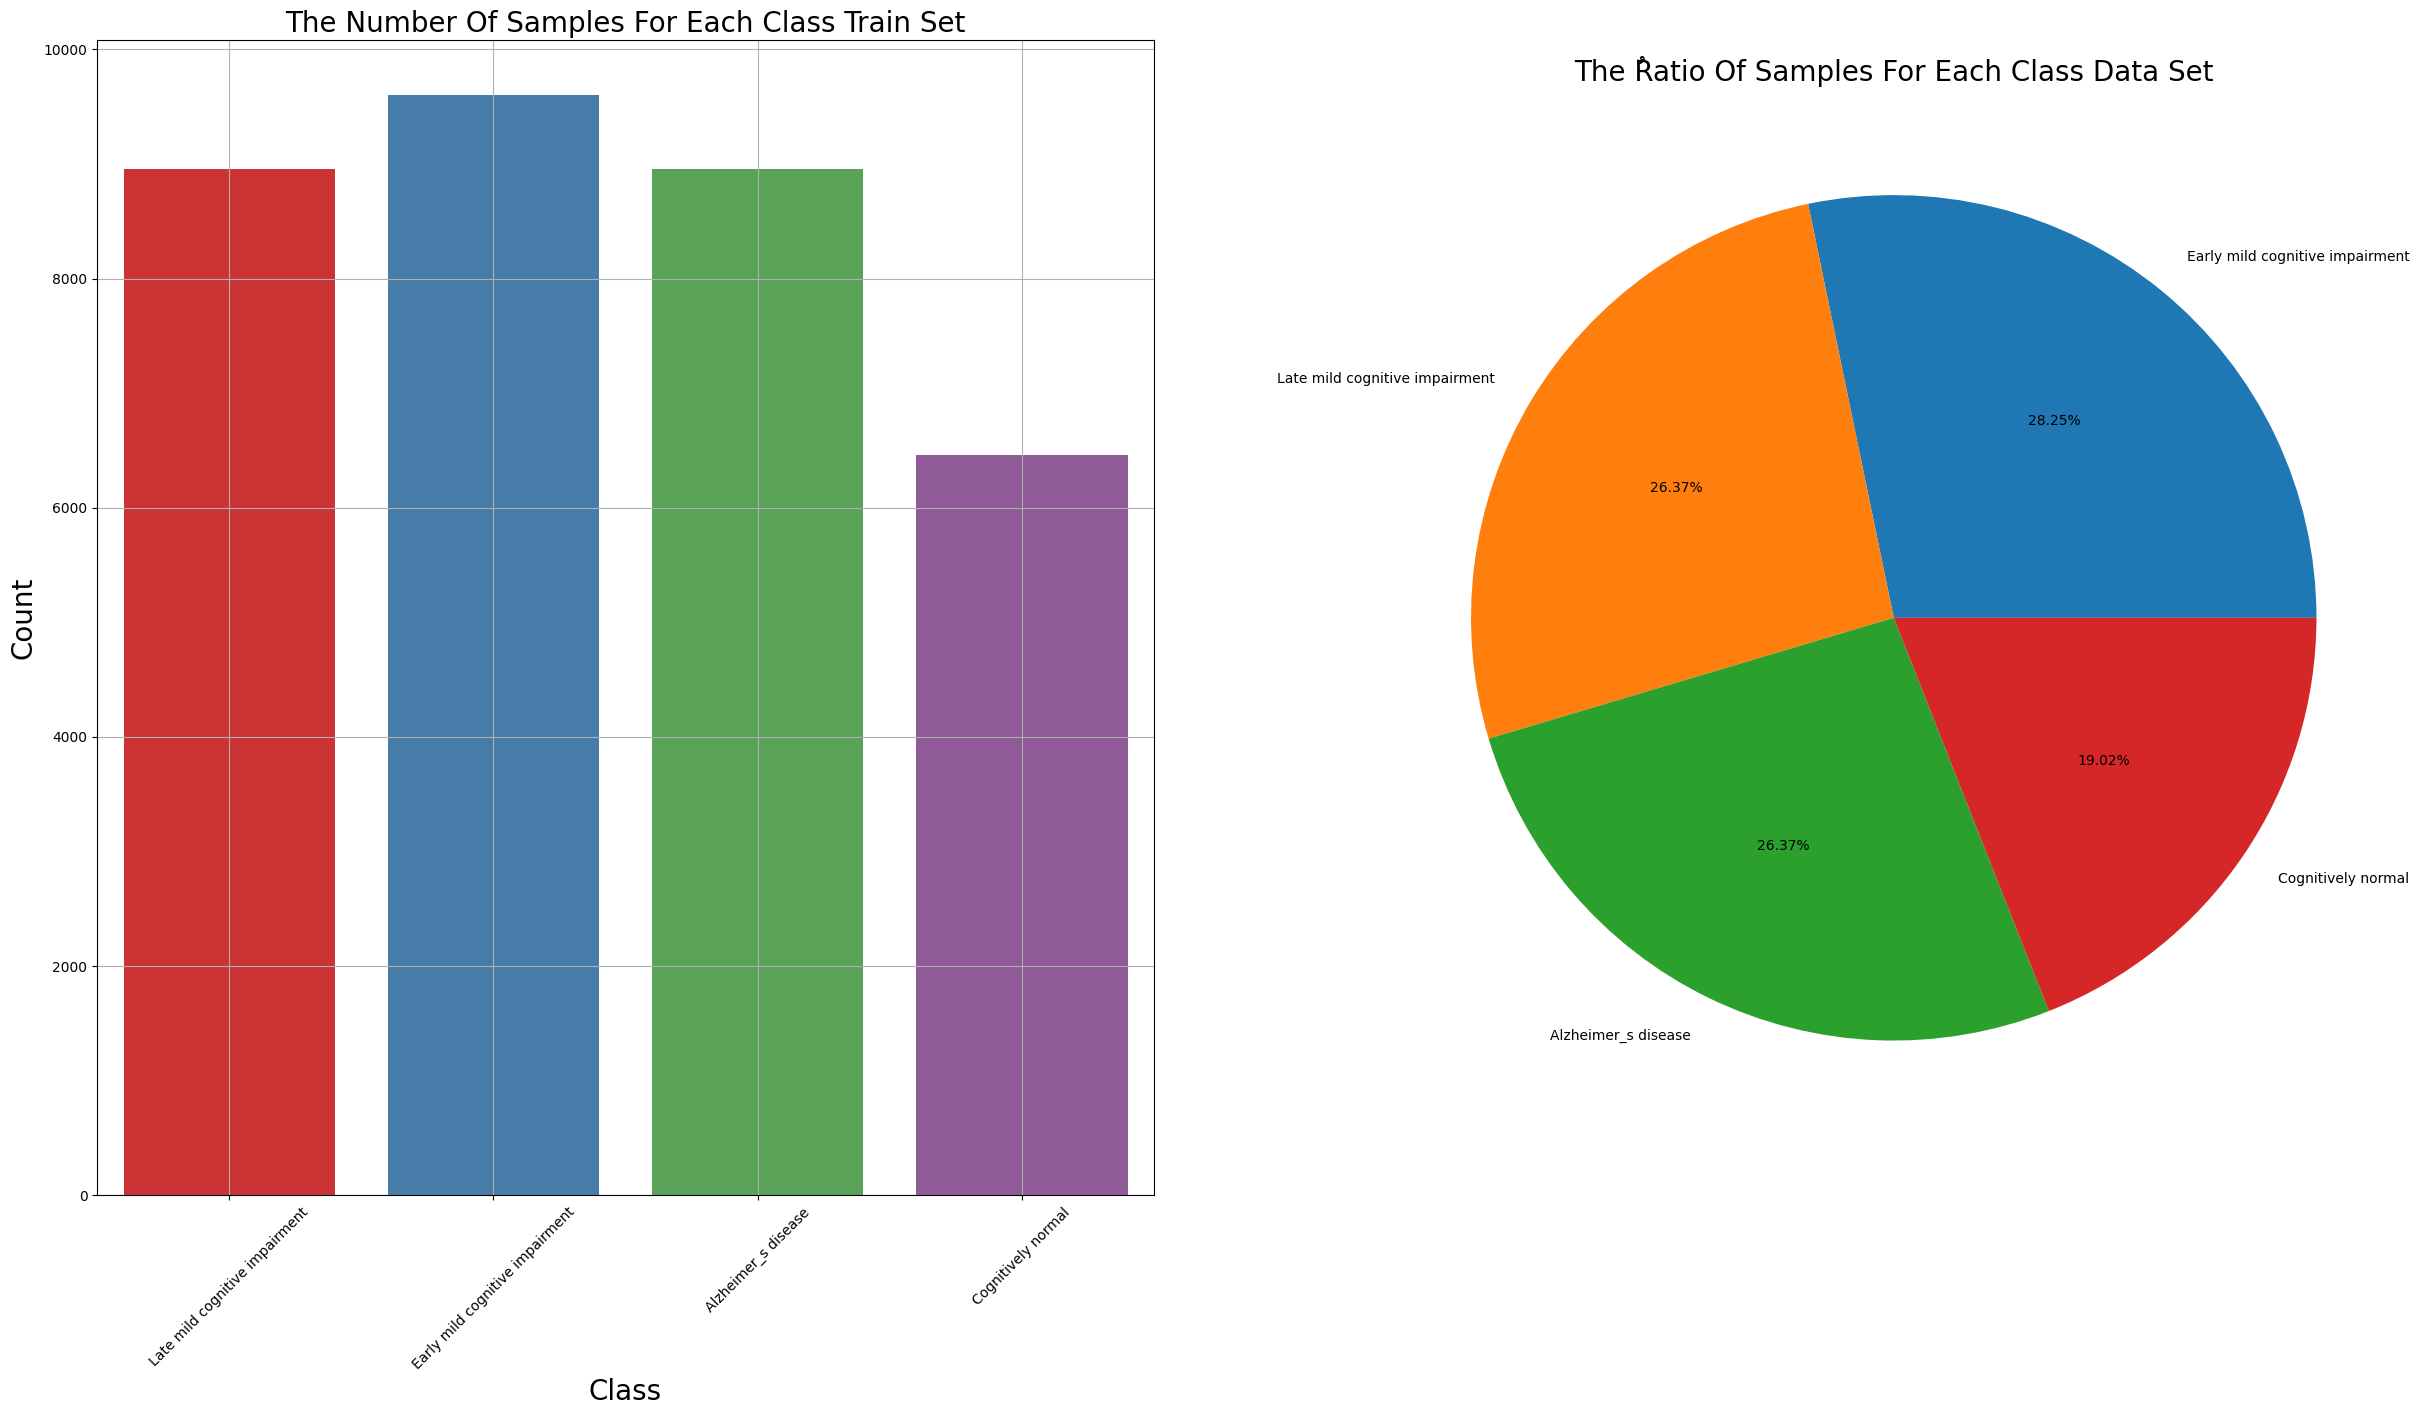

In [6]:
 #Visualizing class distribution using count plot and pie chart
plt.figure(figsize=(30, 15))

# Count Plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='label', data=df, palette='Set1')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class Train Set', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(x=df['label'].value_counts(), autopct='%1.2f%%', labels=df['label'].value_counts().index, radius=1)
plt.title('The ٌRatio Of Samples For Each Class Data Set',fontsize=20)

plt.show()

In [7]:
X_train, X_test1, y_train, y_test1 = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42,shuffle=True,stratify=df['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [8]:
pd.DataFrame(y_train).value_counts()

label                          
Early mild cognitive impairment    7680
Alzheimer_s disease                7168
Late mild cognitive impairment     7168
Cognitively normal                 5171
Name: count, dtype: int64

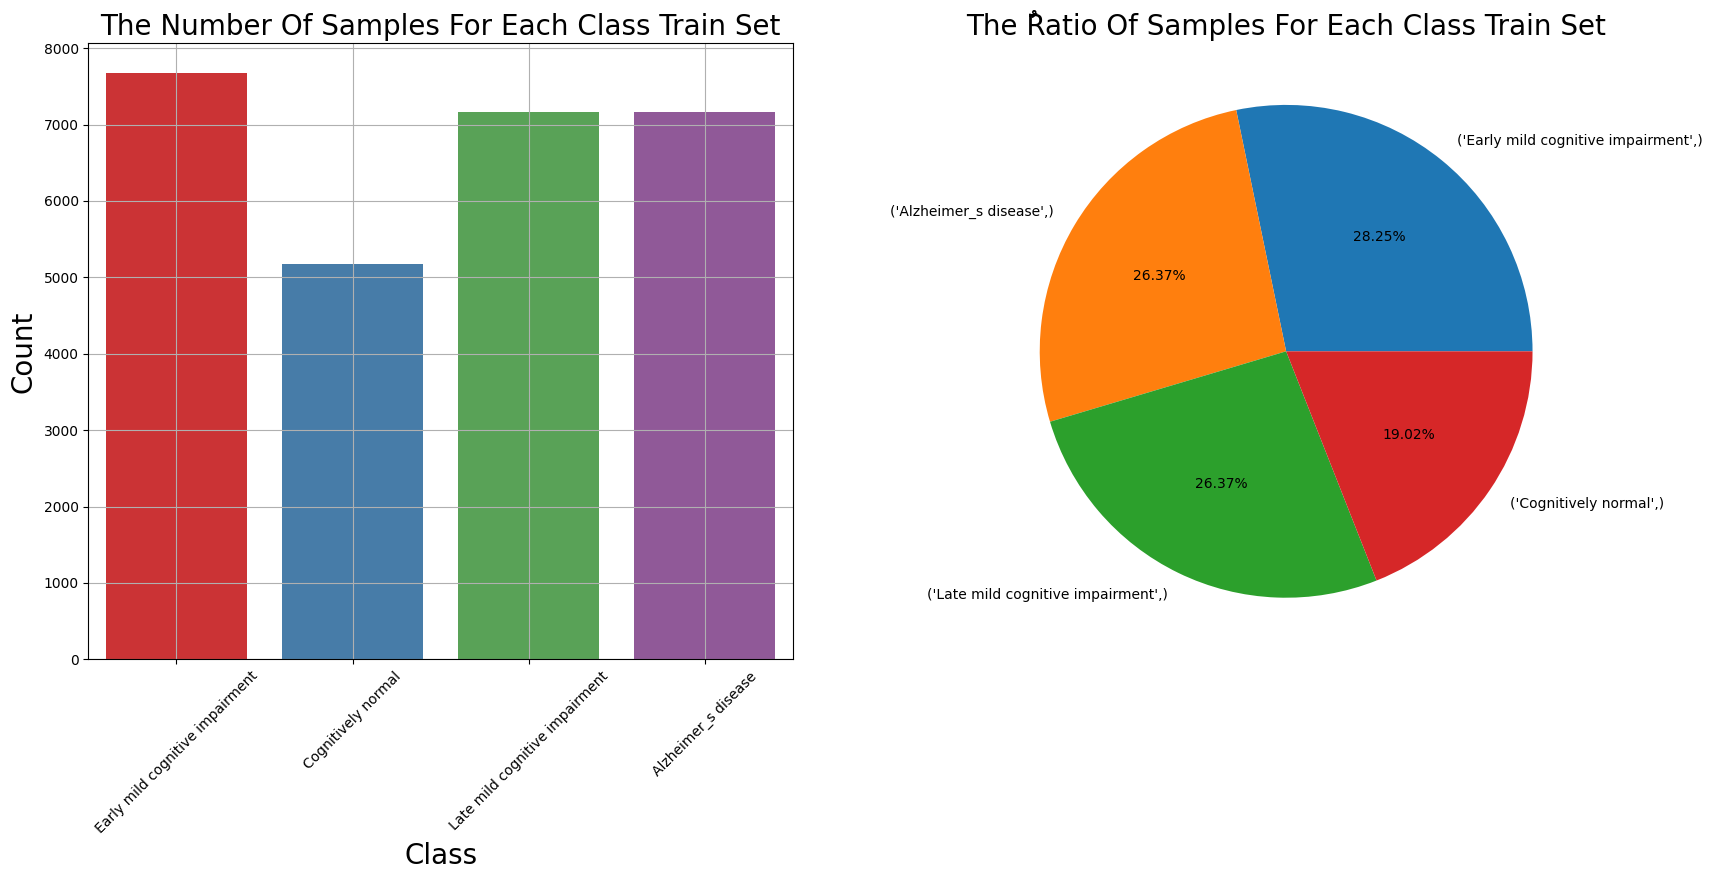

In [9]:
# Count Plot
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
ax = sns.countplot(x=y_train, palette='Set1')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class Train Set', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1,2,2)
plt.pie(x=pd.DataFrame(y_train).value_counts(), autopct='%1.2f%%', labels=pd.DataFrame(y_train).value_counts().index, radius=1)
plt.title('The ٌRatio Of Samples For Each Class Train Set', fontsize=20)
plt.show()

In [10]:
pd.DataFrame(y_test).value_counts()

label                          
Early mild cognitive impairment    960
Alzheimer_s disease                896
Late mild cognitive impairment     896
Cognitively normal                 647
Name: count, dtype: int64

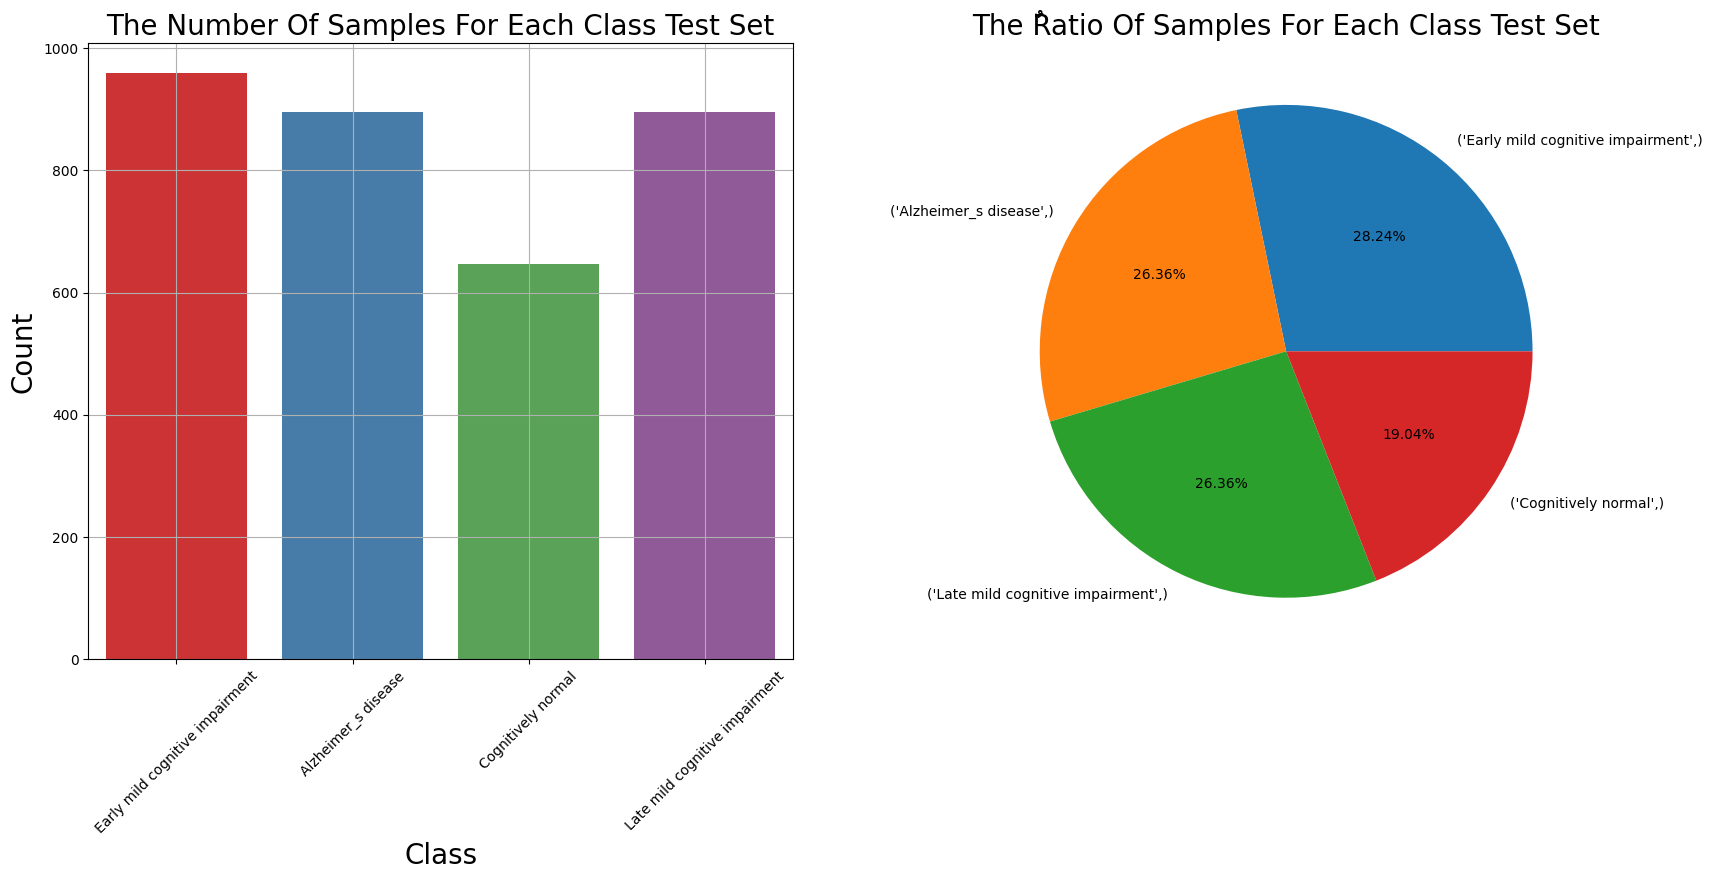

In [11]:
# Assuming test_y is a list
# Count Plot
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
ax = sns.countplot(x=y_test, palette='Set1')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class Test Set', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1,2,2)
plt.pie(x=pd.DataFrame(y_test).value_counts(), autopct='%1.2f%%', labels=pd.DataFrame(y_test).value_counts().index,radius=1)
plt.title('The ٌRatio Of Samples For Each Class Test Set', fontsize=20)
plt.show()

In [12]:
pd.DataFrame(y_val).value_counts()

label                          
Early mild cognitive impairment    960
Alzheimer_s disease                896
Late mild cognitive impairment     896
Cognitively normal                 646
Name: count, dtype: int64

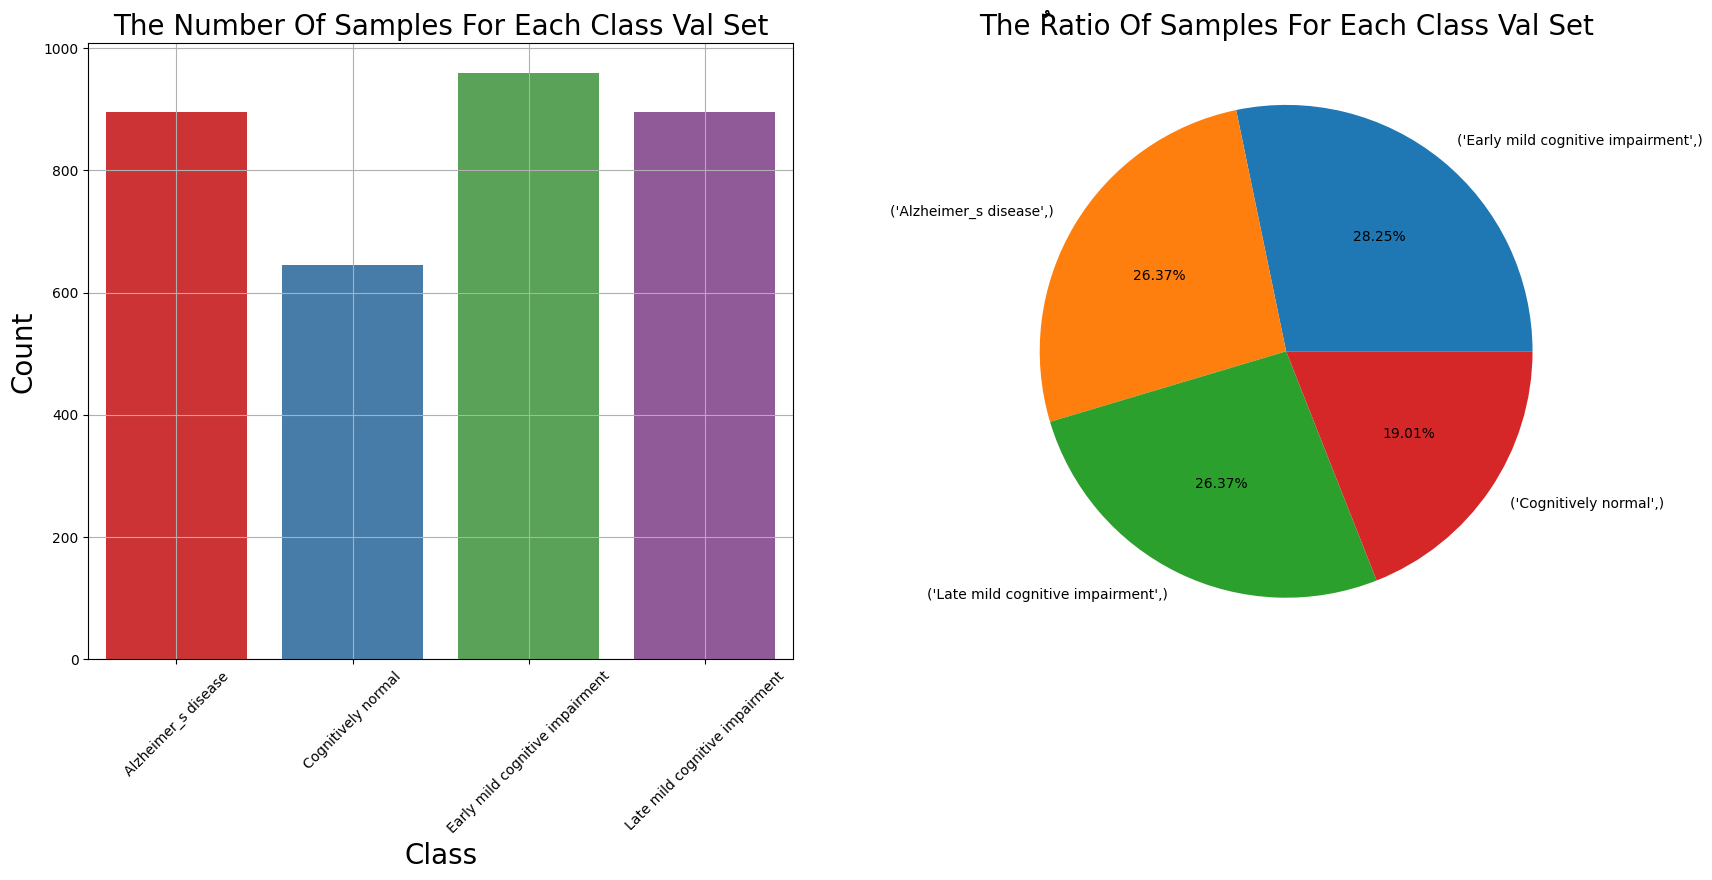

In [13]:
# Count Plot
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
ax = sns.countplot(x=y_val, palette='Set1')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class Val Set', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1,2,2)
plt.pie(x=pd.DataFrame(y_val).value_counts(), autopct='%1.2f%%', labels=pd.DataFrame(y_val).value_counts().index, radius=1)
plt.title('The ٌRatio Of Samples For Each Class Val Set', fontsize=20)
plt.show()

In [14]:
class_num=np.sort(['Alzheimer_s disease','Cognitively normal','Early mild cognitive impairment','Late mild cognitive impairment'])
class_num

array(['Alzheimer_s disease', 'Cognitively normal',
       'Early mild cognitive impairment',
       'Late mild cognitive impairment'], dtype='<U31')

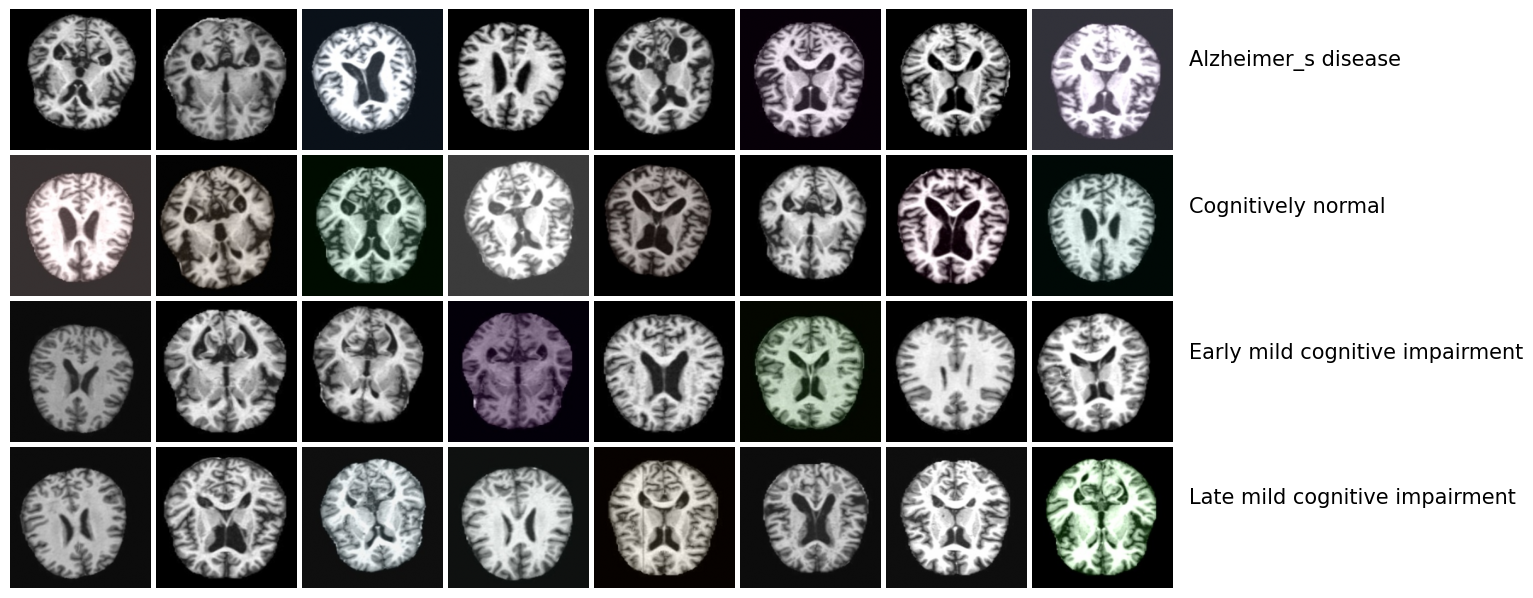

In [15]:
NUM_IMAGES_PER_CLASS = 8
NUM_CATEGORIES=4
fig = plt.figure(1, figsize=(15, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_IMAGES_PER_CLASS), axes_pad=0.05)
i = 0

for category_id, category in enumerate(class_num):
    for filepath in df['image'][df['label'] == category][:NUM_IMAGES_PER_CLASS]:
        ax = grid[i]
        img = cv2.imread(filepath)
        img=cv2.resize(img,(224,224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img / 255)
        ax.axis('off')
        
        if i % NUM_IMAGES_PER_CLASS == NUM_IMAGES_PER_CLASS - 1:
            ax.text(250, 80, category, verticalalignment='center', size=15)
        
        i += 1

plt.show()